# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
y = df["Salary"]
X = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

### En Önemli Parametreler
* **n_estimators:** Fit edilecek olan ağaç sayısıdır.
* **max_features:** Bölünme işlemlerinde göz önünde bulundurulacak olan değişken sayısıdır.
* **min_samples_split**
* **max_depth**

In [6]:
params = {
    "max_depth": range(1,10), # maksimum derinlik
    "max_features": [1,2,5,10],
    "n_estimators": [200,500,1000,2000],
    "min_samples_split": [2,10,80,100],
}
rf = RandomForestRegressor()
model_cv = GridSearchCV(rf, params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)
model_cv.best_params_

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 16.1min finished


{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [7]:
model_tuned = RandomForestRegressor(random_state=42,
                                    max_depth=8,
                                    max_features=2,
                                    min_samples_split=2,
                                    n_estimators=200).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.6776176416439

## Değişken Önem Düzeyi

* Değişkenlerin önemlerinin skorlarına bakalım.

In [8]:
model_tuned.feature_importances_*100

array([5.83939512, 6.3008207 , 3.55409652, 4.19009209, 4.66682274,
       4.98433247, 7.38060012, 9.73911031, 8.6905022 , 7.87635556,
       8.72726849, 8.31591059, 9.70373415, 4.70960845, 2.05129065,
       1.85358891, 0.3831876 , 0.55522635, 0.47805698])

* Skorları ayrı bir sütuna, değişkenlerin isimlerini ayrı bir sütuna alarak DataFrame oluşturuyoruz.
* Ardından değerleri **sort_values** ile **Importance** değişkenine göre, satır bazında ve büyükten küçüğe sıralıyoruz.
* Yani skorlara göre sıralıyoruz.

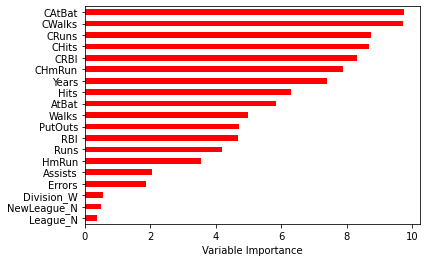

In [9]:
Importance = pd.DataFrame({"Importance": model_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None